In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

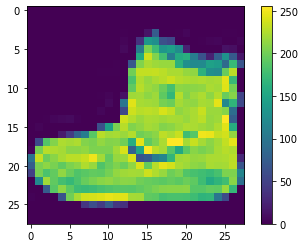

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [8]:
train_images = train_images/255
test_images = test_images/255

In [9]:
class_names = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','boot']

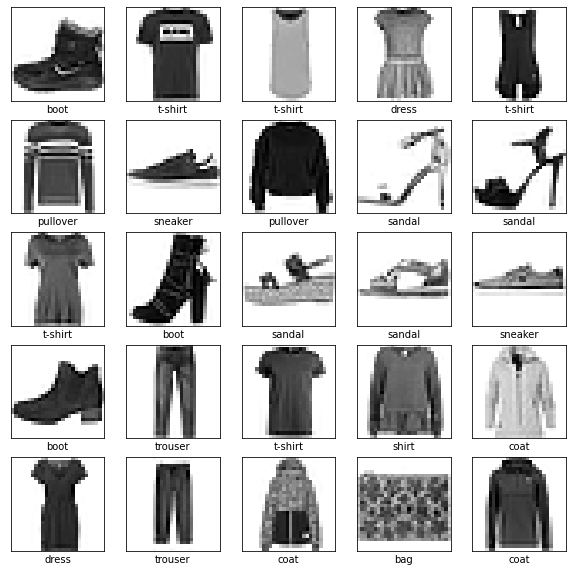

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
# layers
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [16]:
# back propagation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
# training
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4989 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8629: 0s - loss: 0.3786 - accuracy: 0.
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3151 - accuracy: 0.8835
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2972 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2852 - accuracy: 0.8942
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2701 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2603 - accuracy: 0.9038: 0s - loss:
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2501 - accuracy: 0.9072
Epoch 10/10
1875/1875 [=============

In [18]:
# predictions
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3300 - accuracy: 0.8870


In [19]:
predictions = model.predict(test_images)

In [22]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
            

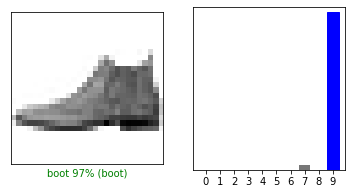

In [23]:
# testing functions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

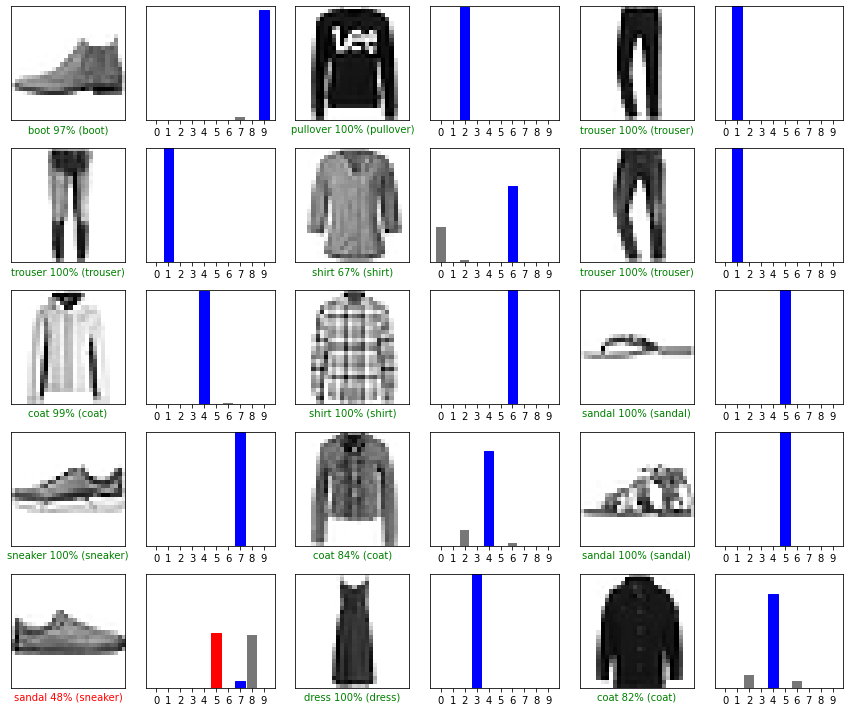

In [26]:
rows = 5
cols = 3
num_images = rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):
    plt.subplot(rows, 2*cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(rows, 2*cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()


In [29]:
# using trained model
img = test_images[10]
img.shape

(28, 28)

In [30]:
img = (np.expand_dims(img, 0))

In [31]:
test_prediction = model.predict(img)
test_prediction

array([[1.01724945e-05, 5.08442604e-08, 1.41250372e-01, 2.34954882e-07,
        8.36093843e-01, 5.72024605e-09, 2.26452742e-02, 4.00363510e-12,
        7.25274489e-08, 6.09494233e-10]], dtype=float32)